<a href="https://colab.research.google.com/github/dayanach/hello-world/blob/master/Assignment_1_Street_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Street View {-}
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build a model that recognizes the correct digit.

In [1]:
%matplotlib inline
%pip install openml # Uncomment to run in Google Colab
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

     |████████████████████████████████| 143kB 2.8MB/s 
  Created wheel for openml: filename=openml-0.9.0-cp36-none-any.whl size=168047 sha256=185fbebea16d3fe737226c2c8daa94658aef55951ce682741e922c7eb5c56c11
  Stored in directory: /root/.cache/pip/wheels/ba/91/bb/74f93ae5dc60d713159def103484640861b338078fe978b8ee
  Created wheel for liac-arff: filename=liac_arff-2.4.0-cp36-none-any.whl size=13333 sha256=78af78f6ef88d44a256b00b98a6ac1f8d10e1e3fb6465df9cb600fb6ddcab0cb
  Stored in directory: /root/.cache/pip/wheels/d1/6a/e7/529dc54d76ecede4346164a09ae3168df358945612710f5203
Successfully built openml liac-arff


In [0]:
# Download Streetview data. Takes a while the first time.
SVHN = oml.datasets.get_dataset(41081)
X, y, cats, attrs = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

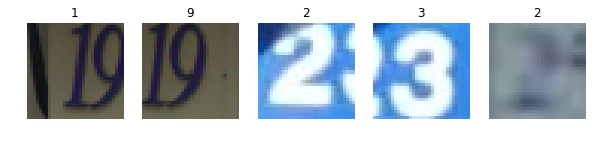

In [3]:
# Plots image. Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    if grayscale:
        [ax.imshow(X[n].reshape(32, 32)/255, cmap='gray')
         for n,ax in enumerate(axes)]
    else:
        [ax.imshow(X[n].reshape(32, 32, 3)/255) for n,ax in enumerate(axes)]
    [ax.set_title((y[n]+1)) for n,ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]
plot_images(X[0:5], y[0:5]);

> **Instructions and advice (remove before submission)**
>  
> * Answer the questions in this notebook, including the code, results, and discussions. 
> * Add precise explanations when interpreting the results of your experiments. Use markdown cells for this.
> * Submit both this notebook and a PDF through Canvas. To create the PDF, see File > Export Notebook as PDFs.
> * Submit only one notebook and one PDF per team. In Jupyter Lab, you can copy-paste cells (with results) into a single notebook. 
> * Keep the PDF below 20 pages. Remove these instructions and the general advise below in the final PDF.
> * Avoid all(!) unnecessary outputs. Only output the answers to the questions. Add ';' behind lines that > generate output to suppress unnecessary output.
> * All tasks can be completed with scikit-learn. You are allowed (but not required) to use other tools as well.
> * Training models can take time. Make sure to start computations well in advance of the deadline. 
> * Be efficient. Don't try every model on all the data at once. Test your code on a small part of the data (even just 1%) until you are sure that there are no more bugs or other issues.
> * Observe how long it takes to train different models on a small part of your data to learn whether the models are fast enough for what you want to do.
> * You are allowed to run code elsewhere (e.g. in Python scripts) and store the results on file. If so, copy the code in this notebook and load/visualize/discuss the results here as well.
> * On [Google Colab](https://colab.research.google.com/) you can run the notebook in the cloud.

### Team details {-}
Add the names of all team members and a short description of each member's contributions.   

TEAM MEMBER 1 = Fabian Kok   

Contributions:

- Exercise 3/4

TEAM MEMBER 2 = Maury Kros

Contributions:

- Exercise 1/2

TEAM MEMBER 3 = Massimo Manca

Contributions:

- Exercise 5/6

TEAM MEMBER 4 = Daan van Wely

Contributions:

- Exercise 1/2

TEAM MEMBER 5 = Dayana Chong

Contributions:

- Exercise 5/6

## 1. Evaluate different models (15 points) {-}
- Take a stratified 10% subsample of the data. Plot the distribution of the classes (as a histogram) for both the original data and the subsample. 
- Evaluate k-Nearest Neighbors, Logistic Regression and Linear SVM on this sample, using their default hyperparameter settings. 
    - Use cross-validation with 3 folds, output the training accuracy and test accuracy including the standard deviations.
- Discuss the results. Are they what you expected? Are the model over/underfitting? What does the standard deviation tell you? Do you think you can get better results with more training data?

## 2. Learning curves (20 points) {-}
- Start with a 1% stratified subsample of the original data. Train all 3 classifiers and record both the accuracy (same as above) and the [training time](https://pythonhow.com/measure-execution-time-python-code/).  
- Repeatedly **add** 1% more statified data (don't take a completely new 2% subsample). Measure accuracy and training time again.
- Continue to at least 10% of the original data. Plot the results as a line graph, with training set size on the x-axis and accuracy and training time, respectively, on the y-axes.
    - If the algorithms are sufficiently fast, you can continue to 100% as well.
- Discuss your results. Which algorithms are fast/slow? Which require more data to get better results? Which ones tend to overfit? Which ones would benefit from more data?

## 3. Data representation (20 points) {-}
* Convert the images to grayscale (use the function below). Check whether the conversion is correct by plotting a few of the converted images.
    * Is the grayscale representation better than the color representation? Does it yield better models? Why (not)? Run the necessary experiments and discuss. For instance, compare the performance of models trained on both representations.
* Afterwards, normalize the data by substracting the mean of the pixel values from every image and dividing by the standard deviation of very image. 
    * Note: Do this for every image independently. Don't compute means or standard deviations over the entire training/test set
    * Again, check whether you have done it correctly by plotting some of the converted images.
    * Is the new representation better? Why (not)? Run the necessary experiments and discuss.
* Finally, run [PCA (Principal Component Analysis)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data and see if that gives you a better (lower-dimensional) representation. Note that you need to use a pipeline here to avoid data leakage between your training and test set (see Tutorial 3).
    * Try different numbers of components or use a solver to guess the optimal number of components
    * Is the new representation better? Why (not)? Run the necessary experiments and discuss.

In [0]:
# Converts an RGB encoded image to a grayscale image
def rgb2gray(X, dim=32):
    return np.expand_dims(np.dot(X.reshape(len(X), dim*dim, 3), [0.2990, 0.5870, 0.1140]), axis=3)
X_gray = rgb2gray(X)

## 4. Regularization (20 points) {-}
- Tune the algorithm's main regularization hyperparameter on the 10% stratified subsample using the normalized grayscale representation. These are the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. 
- We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}] and for n_neighbors between 1 and 50. C should be varied logarithmically, n_neighbors linearly. 
- Run a grid search over these ranges, using 3-fold cross-valdation, and plot both the training and test error. Start with a coarse grid (e.g. 5 values per hyperparameter), use a finer grid for the 'interesting' regions (where performance changes) if training time allows.
- Plot the effect of every one of the hyperparameters (both the training and test score). Discuss the plots. For which values is the model over/underfitting? Is there a sweet spot?
- Evaluate the optimized models (the best hyperparameter settings) on the rest of the (unseen) data and discuss your findings. Do the results generalize? If not, what can/ should you do? Discuss. Run additional experiments if it helps you confirm your claims.

## 5. Interpreting misclassifications (10 points) {-}
- Chances are that your best model is not 100% accurate. Plot a few of the misclassified examples and their predicted and correct labels. Discuss. Are these indeed 'hard' examples that are easy to get wrong?
- Plot the confusion matrix. Which digits are often confused with each other? Which digits are easier/harder to classify? Discuss.

## 6. Interpreting models (15 points) {-}
- Try to understand what the linear models have learned by looking at their model parameters. Are there features (pixels) that are more important than others? What does that tell you?
- Visualize the model parameters of the best (tuned) models as a 32x32 matrix, for each class individually. This means training 10 models in a one-vs-all fashion. Does this help you understand what the model is paying attention to?
- Do the same for an underfitted and an overfitted version of logistic regression. What changes? Is the model paying attention to different parts of the image now?

Good luck!